# Linear Algebra


## Scalar

A scalar is a single numerical value, typically used in mathematics and physics to differentiate from vectors or matrices. It has magnitude only and no direction. In the context of programming and data science, a scalar can be a single number, as opposed to arrays or lists of numbers.

**Example:**

Consider the temperature conversion between Celsius (C) and Fahrenheit (F). In the conversion formula:

F = C × (9/5) + 32

Here, both 'C' and 'F' are scalars. If 'C' is 25 (a single numerical value representing 25 degrees Celsius), then:

F = 25 × (9/5) + 32 = 77

In this example, both 25 (for 'C') and 77 (for 'F') are scalar values.

In [8]:
import torch
x = torch.tensor(3.0)
print(x)

tensor(3.)


## Vector

For current purposes, you can think of a vector as a fixed-length array of scalars. When vectors represent examples from real-world datasets, their values hold some real-world significance.

For example, if we were training a model to predict the risk of a loan defaulting, we might associate **each applicant** with a vector whose components correspond to **quantities like their income, length of employment, or number of previous defaults**, etc..

By default, we visualize vectors by **stacking their elements vertically**:

$$
x = \begin{bmatrix}
0 \\
1 \\
2 \\
\end{bmatrix}
$$



In [9]:
import torch

x = torch.arange(3)
print(x)

tensor([0, 1, 2])


## Matrix 

A **matrix** is a rectangular array of numbers, symbols, or expressions, arranged in rows and columns. Matrices are foundational to linear algebra and are used extensively in mathematics, physics, engineering, statistics, computer graphics, and data science.

### Notation and Terms:

1. **Notation**: 
   - Typically denoted by uppercase letters (e.g., \( A, B, C \)).
   - Elements are typically denoted by the matrix letter and indices (e.g., \( a_{ij} \) for matrix \( A \) where \( i \) denotes the row and \( j \) denotes the column).

   $$ A = \begin{bmatrix}
   a_{11} & a_{12} \\
   a_{21} & a_{22} \\
   \end{bmatrix} $$


2. **Dimensions**:
   - The size of a matrix is defined by its number of rows and columns.
   - A matrix with \( m \) rows and \( n \) columns is said to be of order \( m x n \) and is referred to as an "m by n" matrix.


$$$$
3. **Special Matrices**:
   - **Row Matrix**: A matrix with only one row.
   - **Column Matrix**: A matrix with only one column.
   - **Square Matrix**: A matrix with the same number of rows and columns.
   - **Identity Matrix**: A square matrix where all the elements of the principal diagonal are ones and all other elements are zeros.
   - **Zero Matrix**: A matrix where all elements are zeros.

### Uses:

Matrices are used in various domains:
- **Linear Algebra**: For solving systems of linear equations.
- **Computer Graphics**: Transformation matrices are used for rotating, scaling, and translating graphics.
- **Data Science**: Matrices are used in statistics, optimization, and machine learning algorithms.

*Note*: Matrix operations, like addition, subtraction, and multiplication, follow specific rules and are fundamental to understanding their properties and applications.


In [10]:
from src.matrix.matrix_n00b import MatrixNoob
# From scratch example
matrix_noob = MatrixNoob()

arr = [1,2,3,4,5,6,7,8,9]
matrix_3x3 = matrix_noob.list_to_matrix(arr, 3)
matrix_noob.print_matrix(matrix_3x3)

[
    ['1.000', '2.000', '3.000'],
    ['4.000', '5.000', '6.000'],
    ['7.000', '8.000', '9.000'],
]


In [11]:
# Torch exampe
matrix_3x3 = torch.tensor([1,2,3,4,5,6,7,8,9]).view(3, 3)
print(matrix_3x3)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


## Tensor Orders Explained

### 0-Order Tensor (Scalar)
A 0-order tensor is simply a scalar.
- It has no direction, just magnitude (This is essentially the "size" or "amount" of the scalar).
- For example, the number: $$ c = 5 $$ is a 0-order tensor.
- In machine learning frameworks like TensorFlow or PyTorch, a scalar is still represented as a tensor, just with **0 dimensions.**

### 1-Order Tensor (Vector)
A 1-order tensor is a vector.
- It requires one index to specify a particular element.
- For example, the vector:
  $$ \mathbf{v} = [1, 2, 3] $$
  is a 1-order tensor. You can refer to its elements as \( v_1 \), \( v_2 \), and \( v_3 \).
- This is equivalent to an array in programming terms, where each element is accessed using a single index.

### 2-Order Tensor (Matrix)
A 2-order tensor is a matrix.
- It requires two indices to specify a particular element.
- For example, the matrix:
  $$ M = \begin{bmatrix}
  1 & 2 \\
  3 & 4 \\
  5 & 6 \\
  \end{bmatrix} $$
  Elements can be referred to using two indices, like \( M_{11} \), \( M_{12} \), and \( M_{21} \) etc.
- It generalizes the concept of a 2D array where you access elements using row and column indices.


![tensor](./img/0_linear_algebra/tensor_explained.png)

*Details: 

[TensorFlow Guide on Tensors](https://www.tensorflow.org/guide/tensor)

[PyTorch Tensor](https://pytorch.org/docs/stable/tensors.html)




In [12]:
# Tensors 
import torch

print("0-Order Tensor (Scalar):")
print(torch.tensor(3))

print("1-Order Tensor (Vector):")
print(torch.arange(0, 3))

print("2-Order Tensor (Matrix):")
matrix = torch.arange(1, 9).reshape(4, 2) 
print(matrix)

0-Order Tensor (Scalar):
tensor(3)
1-Order Tensor (Vector):
tensor([0, 1, 2])
2-Order Tensor (Matrix):
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])



## Tensors will become more important when we start working with images. 

Each image arrives as a 3-order tensor with axes corresponding to the **height, width, and channels**. 
- 2-Order Tensor. 1 Channel: Only one channel is present, which represents the intensity of light, from black (lowest intensity)
- 3-Order Tensor. 3 Channels RGB
- 4-Order Tensor. When you see a tensor shape like [32, 3, 224, 224] for images, it often means you're working with a batch of 32 RGB images, each of size 224x224 pixels. The number "32" in this example is the size of the batch dimension.

Image height×Image width×Number of channels

<img src="./img/0_linear_algebra/2d_order_tensor_3_slices.png" width="500" height="400">


In [16]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the image using PIL (Python Imaging Library)
image_RGB = Image.open("./img/0_linear_algebra/smile_RGB.jpeg")  

# Define a transformation to convert the image to a tensor
transform = transforms.ToTensor()

# Apply the transformation to the image
image_tensor = transform(image_RGB)

# Check the dimensions of the resulting tensor
# Get the dimensions of the resulting tensor (channels, height, width)
channels, height, width = image_tensor.shape

# Log the dimensions
print("Image tensor shape:")
print("Channels:", channels)
print("Height:", height)
print("Width:", width)


Image tensor shape:
Channels: 3
Height: 713
Width: 980


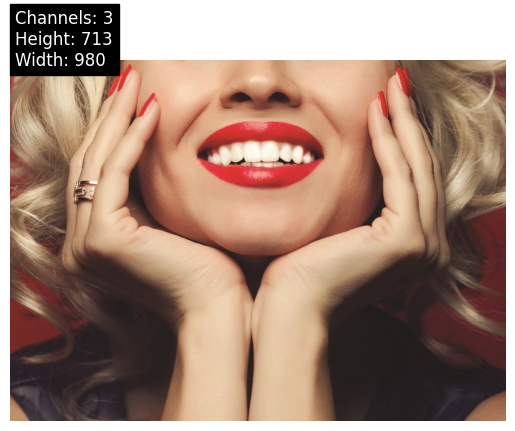

In [17]:
# Show image
# Create a figure and axes for displaying the image
fig, ax = plt.subplots(1, 1)
# Display the image using Matplotlib
ax.imshow(image_tensor.permute(1, 2, 0))  # Permute channels to (height, width, channels)
# Add text annotation with image information
info_text = f"Channels: {channels}\nHeight: {height}\nWidth: {width}"
ax.text(10, 10, info_text, fontsize=12, color='white', backgroundcolor='black')
# Remove axis labels and ticks
ax.axis('off')
# Show the figure
plt.show()

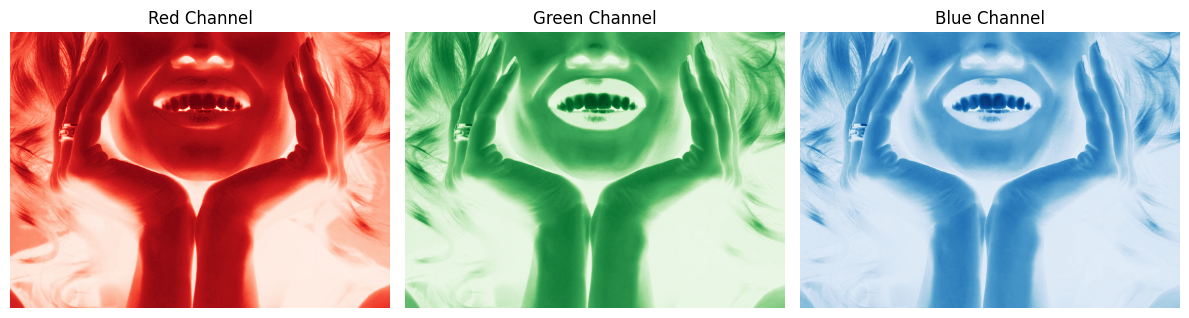

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

# Split the image into color channels
red_channel, green_channel, blue_channel = image_RGB.split()

# Display the separate color channels using Matplotlib
plt.figure(figsize=(12, 4))

# Red channel
plt.subplot(131)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(132)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(133)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


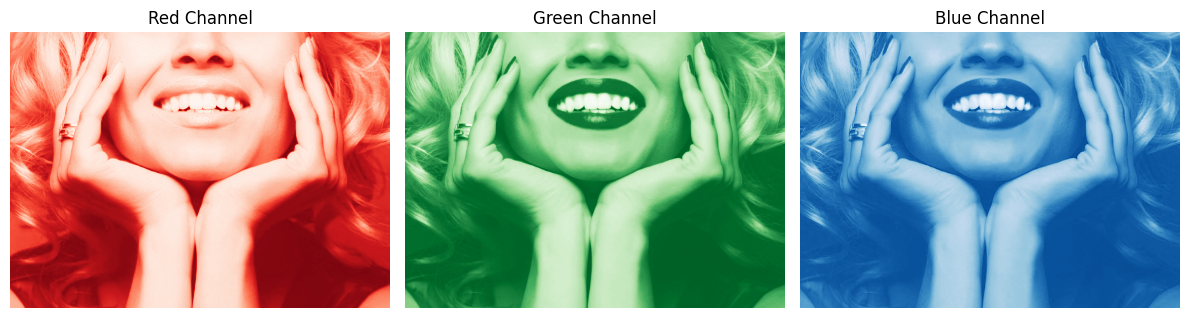

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
image_RGB = Image.open("./img/0_linear_algebra/smile_RGB.jpeg")  

# please see https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Split the image into color channels
red_channel, green_channel, blue_channel = image_RGB.split()

# Display the separate color channels using Matplotlib
plt.figure(figsize=(12, 4))

# Red channel
plt.subplot(131)
plt.imshow(red_channel, cmap='Reds_r')
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(132)
plt.imshow(green_channel, cmap='Greens_r')
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(133)
plt.imshow(blue_channel, cmap='Blues_r')
plt.title('Blue Channel')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

In [30]:
import matplotlib.pyplot as plt
import torch


image_RGB = Image.open("./img/0_linear_algebra/smile_RGB.jpeg")  
transform = transforms.ToTensor()
image_tensor = transform(image_RGB)

print(image_tensor.shape)


torch.Size([3, 713, 980])


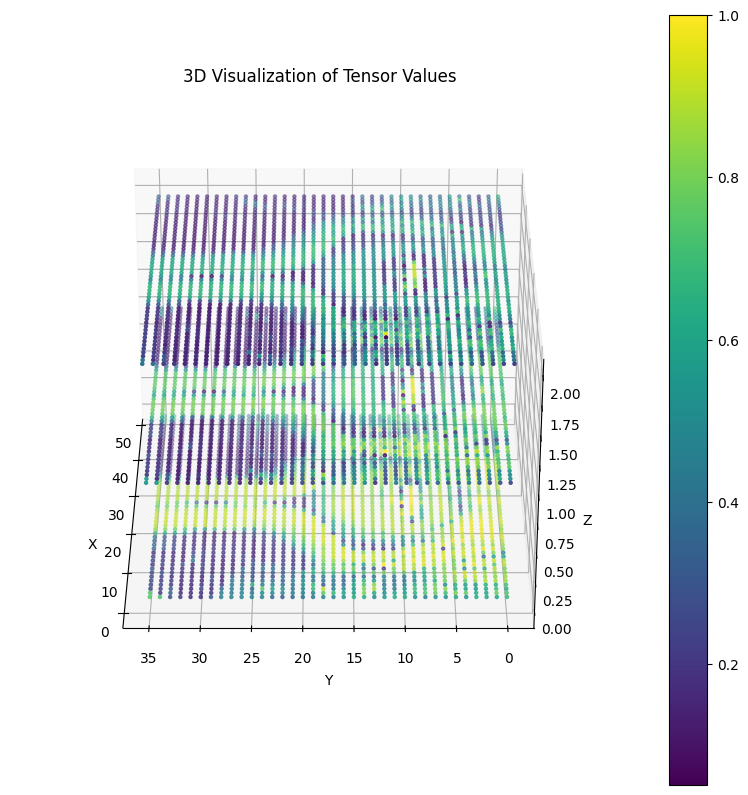

In [32]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Sample tensor (using random data for demonstration)
tensor = image_tensor

# Down-sample the tensor for visualization
stride = 20
tensor_small = tensor[:, ::stride, ::stride]

# Extracting x, y, z coordinates and values
z, y, x = tensor_small.nonzero(as_tuple=True)
values = tensor_small[z, y, x].numpy()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x.numpy(), y.numpy(), z.numpy(), c=values, cmap='viridis', s=5)
plt.colorbar(scatter)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of Tensor Values')

ax.view_init(elev=30, azim=100) 

plt.show()


import torch
import matplotlib.pyplot as plt
import numpy as np

# Sample tensor (using random data for demonstration)
tensor = torch.rand((3, 713, 980))

# Down-sample the tensor for visualization
stride = 20
tensor_small = tensor[:, ::stride, ::stride]

# Extracting x, y, z coordinates and values
z, y, x = tensor_small.nonzero(as_tuple=True)
values = tensor_small[z, y, x].numpy()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x.numpy(), y.numpy(), z.numpy(), c=values, cmap='viridis', s=5)
plt.colorbar(scatter)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of Tensor Values')

plt.show()


#TODO 3-order tensor

https://www.kaggle.com/datasets/daavoo/3d-mnist

This dataset contains 3D point clouds generated from the original images of the MNIST dataset to bring a familiar introduction to 3D to people used to work with 2D datasets (images).

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

4d tensor

nn.Conv2d expects an input in the shape [batch_size, channels, height, width]
input = torch.randn(20, 16, 50, 100)

1) Channels: 3 Height: 713 Width: 980


Depth 100; Height: 713 Width: 980
Depth 99; Height: 790 Width: 1024 channels "will be cube for "

# TODO 
1. Sum channels 


eigen values + 
singular value decomposition + 
eigen vectors + 

diagonal matrix
sparce matrix
block matrix
tri-diagonal matrix

3. hyperspectral images (50k channels) https://web.pdx.edu/~nauna/resources/8-2012_lecture1-vegetationindicies.pdf, https://en.wikipedia.org/wiki/Vegetation_index
